In [1]:
import numpy as np
import random

In [2]:
x=np.random.uniform(low=0.0, high=1.00000000000001, size=(100,10))

In [3]:
x[0]

array([0.80117867, 0.1848683 , 0.8105003 , 0.98450811, 0.82066302,
       0.64121645, 0.00889402, 0.56473876, 0.97550226, 0.22594168])

In [4]:
n=np.random.normal(loc=0.0, scale=1.0, size=100)

In [5]:
y=np.zeros((100))

for sample in range(0,100):
    a=0
    
    for i in range(1,11):
        a=x[sample][i-1]*i+a
    y[sample]=a+0.1*n[sample]


In [6]:
def ypred(weights, x, n):
    weights = weights.reshape(1,n+1)  # Reshaping the weights in a row vector
    pred = np.zeros((x.shape[0],1)) # Y predicted initialization 100 in number
    for s in range(0,x.shape[0]): # from all samples pick s sample and multiply with weights to get a prediction

        pred[s] = float(np.matmul(weights, x[s]))# Implementation of Multivarient linear regression 
        ## i.e. y = weight0*x0+weight1*x1+wegiht2*x2.....weight10*x10
    pred = pred.reshape(x.shape[0]) # make the column vector to 100 label vector 
    return pred

In [7]:
def GD(weights, learning_rate, epochs,h,x, y, n):
    error = np.ones(epochs) # loss track 
    for i in range(0,epochs): # number of training iterations
        weights[0] = weights[0] - (learning_rate/x.shape[0]) * sum(h - y) # Updating Weight[0] as x[0] is one so 
                                                                            #excluded from the loop
        for j in range(1,n+1): #  Update the reamining Weights[1:10]
            # update for remaining Weigths 
            weights[j] = weights[j] - (learning_rate/x.shape[0]) * sum((h-y) * x.transpose()[j]) 
        h = ypred(weights, x, n) #calculate new prediction
        error[i] = (1/x.shape[0]) * sum(np.square(h - y)) # calculate mean squared error
        if error[i]<0.004:
            print("is the number of epochs it runs ",i)
            break
            
    weights = weights.reshape(1,n+1)
    return weights, error

In [8]:
def SGD(weights, learning_rate, epochs,h,x, y, n):
    error = np.ones(epochs) # loss track 
    for i in range(0,epochs): # number of training iterations
        for s in range(0,x.shape[0]):
            weights[0] = weights[0] - (learning_rate) * (h[s] - y[s]) # Updating Weight[0] as x[0] 
                                                                            #is one so 
                                                                            #excluded from the loop
            for j in range(1,n+1): #  Update the reamining Weights[1:10]
                # update for remaining Weigths 
                weights[j] = weights[j] - (learning_rate) * ((h[s]-y[s]) * x[s].transpose()[j]) 
            h = ypred(weights, x, n) #calculate new prediction
        error[i] = (1/x.shape[0]) * sum(np.square(h - y)) # calculate mean squared error
        if error[i]<0.004:
            print("is the number of epochs it runs ",i)
            break
            
    weights = weights.reshape(1,n+1)
    return weights, error

In [9]:
def multivarient_linear_regression_gd(x, y, learning_rate, epochs):
    n = x.shape[1] # Number of features in one sample 
    weights = np.zeros(n+1) # the number of features are 11 now so does the weights
    one_column = np.ones((x.shape[0],1)) # generating ones for making symetry 
    x = np.concatenate((one_column, x), axis = 1) # padding x to add column of ones
    
    h = ypred(weights, x, n) # pred the y, only once to use this in future Gradient Descent 
    # returning the optimized parameters by Gradient Descent...
    theta, cost = GD(weights,learning_rate,epochs,h,x,y,n)
    return theta, cost,x

In [10]:
def multivarient_linear_regression_sgd(x, y, learning_rate, epochs):
    n = x.shape[1] # Number of features in one sample 
    weights = np.zeros(n+1) # the number of features are 11 now so does the weights
    one_column = np.ones((x.shape[0],1)) # generating ones for making symetry 
    x = np.concatenate((one_column, x), axis = 1) # padding x to add column of ones
    
    h = ypred(weights, x, n) # pred the y, only once to use this in future Gradient Descent 
    # returning the optimized parameters by Gradient Descent...
    theta, cost = SGD(weights,learning_rate,epochs,h,x,y,n)
    return theta, cost,x

In [11]:
learning_rate = 0.05
epochs = 3000
weights, error, x = multivarient_linear_regression_sgd(x, y,learning_rate, epochs)

In [12]:
error.min()

0.008199285790087829

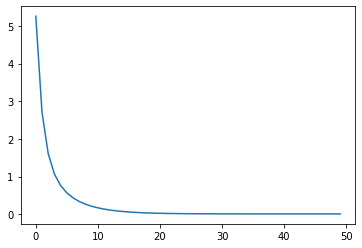

In [13]:
import matplotlib.pyplot as plt 
plt.plot(error[:50])

In [13]:
print(float(np.matmul(weights, x[2])))

31.83861069534432


In [14]:
y[2]

20.073016673401522

In [15]:
print(weights)

[[ 0.01026414  0.97485742  1.98110717  3.05215968  4.01058638  4.98384489
   5.98832801  7.02999712  7.95881423  8.98653408 10.01141102]]


In [16]:
def ypred(weights,x):
    pred = np.zeros((x.shape[0],1))
    weights = weights.reshape(1,n+1)
    for i in range(0,X.shape[0]):
        pred[i] = float(np.matmul(theta, X[i]))
    pred = pred.reshape(X.shape[0])
    return pred

In [18]:
def GD(m,pred,y,x,weights, alpha, epochs,early_stopping,numberofwieghts):
    for i in range(0,num_iters):
        theta[0] = theta[0] - (alpha/X.shape[0]) * sum(h - y)
        for j in range(1,n+1):
            
            theta[j] = theta[j] - (alpha/X.shape[0]) * sum((h-y) * X.transpose()[j])
        h = ypred(theta, X, n)
        cost[i] = (1/X.shape[0]) * 0.5 * sum(np.square(h - y))
    theta = theta.reshape(1,n+1)
    